<a href="https://colab.research.google.com/github/Barbarak17/Research-Projects/blob/master/qbs108_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## QBS 108: Project 1

#### Barbara Karakyriakou
#### March 26, 2024

1. (10 pts) Write a loss function that can be used for each of the models below. Please write down the formulas. No coding is required.

*   L2-Regularized Linear Regression
$$L(w) = \frac{1}{n}*\Sigma_{i=1}^{n}(y_i - wx_i)^2 + \lambda \Sigma_{j=0}^{d}w_{j}^{2}$$
    *   n = number of samples
    *   y = observed values (outcomes)
    *   x = features
    *   w = coefficients (weights)
    *   λ = regulirization parameter
    *   d = number of features (dimensions)




*   LL1-Regularized Logistic Regression
$$L(w) = \frac{1}{n}*\Sigma_{i=1}^{n}[-y_ilog(wx_i)-(1-y_i)log(1-wx_i)+ \lambda \Sigma_{j=0}^{d}|w_j|$$
The terms are same as above but this is a log-loss function with a lasso (L1) regularization term, instead of the MSE function with the ridge (L2) regularization as the previous one.

2. (5 pts) You are working on a binary classification task using a dataset with 10,000 features. Which logistic regression model (unregularized, L2, or L1) and parameters (lambda high or low) would be most useful for determining a small set of parameters that are most important for classification? Please provide the reason(s) of your choice.\
L1 or lasso would be best with low lambda. To identify the most important ones among a large set of features, the L1 method is best because it introduces sparsity by driving many feature weights to zero. To avoid, however, losing important features, the use of a low lambda is required for a balance between accuracy and sparsity.

3. (30 pts) In this part, you are asked to create a Python class from scratch for logistic regression.
(15 pts) Implement a L2-regularized logistic regression model that trains using stochastic gradient descent and returns the losshistory from 500 epochs of training. You should use the starter code provided below and complete the missing part.

In [2]:
import numpy as np

class LogisticGD :
    def __init__(self, num_vars =100, lr=0.01 , l2=0.001):
        # initiate model weights here
        self.w = np.random.randn(num_vars)
        # initiate bias
        self.b = np.random.randn(1)
        # other things to remember
        self.num_vars = num_vars
        self.lr = lr
        self.l2 = l2

    def get_loss(self, X, y, mode ='train'):
        # 1. calculate the model prediction
        h = np.dot(X, self.w) + self.b
        # 2. calculate the outcome probability using sigmoid function
        p = 1/(1 + np.exp(-h))
        # Add epsilon to probabilities to prevent taking logarithm of zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        # 3. calculate the loss
        if mode == 'train':
            # calculate the regularized loss
            l = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p)) + self.l2 * np.sum(self.w**2)
        else :
            # calculate the unregularized loss
            l = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
        # 4. store some intermediate results to be used in the update function
        self.p = p
        self.y = y
        self.X = X
        return l

    def update(self):
        # ##############
        # implement the gradient descent here
        # you can use some of the intermediate results that
        # stored by loss function
        # ##############
        # 1. calculate the gradient
        partial_w = np.dot(self.X.T, (self.p - self.y)) / self.X.shape[0] #+ 2 * self.l2 * self.w
        partial_b = np.mean(self.p - self.y)
        # 2. update the weights
        self.w = self.lr * partial_w
        self.b = self.lr * partial_b

    def fit(self, Xtrain, Ytrain, Xval, Yval, num_epochs=500):
        # first save some information
        num_examples_tr, num_vars = Xtrain.shape
        num_examples_val = Xval.shape[0]

        assert num_vars == self.num_vars
        loss_tr = []
        loss_val = []

        loss_history = np.zeros([num_epochs, 2])

        for epoch in range (num_epochs):
            # implement the training step
            for i in range(num_examples_tr):
                loss_tr.append(self.get_loss(Xtrain[i:i+1], Ytrain[i:i+1]))

            # implement the validation step
            for i in range(num_examples_val):
                loss_val.append(self.get_loss(Xval[i:i+1], Yval[i:i+1]))

            # update weights
            self.update()
            # save the training loss and validation loss to loss_history
            loss_history[epoch, 0] = np.mean(loss_tr)
            loss_history[epoch, 1] = np.mean(loss_val)

        return loss_history

*   Split the development data into training data and validation data. You should not use the test data at this stage.

In [3]:
import pandas as pd

# Load the development data
url = 'https://raw.githubusercontent.com/Barbarak17/qbs108_ps1/main/data_dev.csv'
data_dev = pd.read_csv(url)
print(data_dev.head())

# Split features and labels
X_dev = data_dev.iloc[:, :-1]  # Features (first 100 columns)
Y_dev = data_dev.iloc[:, -1]   # Outcome (last column)

# Split the development data into training and validation sets
from sklearn.model_selection import train_test_split

# X_train and Y_train represent the training data, and X_val and Y_val represent the validation data

X_train, X_val, Y_train, Y_val = train_test_split(X_dev, Y_dev, test_size=0.25, random_state=42)

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   2.502411  -0.437764  -4.103228  -0.662346   4.473880  -1.453992   
1   0.463443   0.279390  -3.748785   1.464970   3.481705  -0.157691   
2   5.858464  -0.486031   4.071384  -5.017084  -4.891481   0.699951   
3   0.331557  -0.329161  -2.130943   2.172487  -4.828062   0.407053   
4  -3.129863  -0.387409   1.621859   0.299029  -3.996344   0.466780   

   feature_6  feature_7  feature_8  feature_9  ...  feature_91  feature_92  \
0  -4.659429  -3.570986   0.626150  -1.759398  ...    0.226994    1.940368   
1  -3.352538  -4.794310  -0.757529  -0.078873  ...    2.422127   -2.810542   
2  -2.670250  -0.539152   1.902807   0.490167  ...   -8.455513   -7.231071   
3  -5.370107  -5.077496  -0.748179  -0.287868  ...    0.078226   -6.293514   
4  -4.109414  -4.556832   0.246852   1.817783  ...   -3.897031   -1.437759   

   feature_93  feature_94  feature_95  feature_96  feature_97  feature_98  \
0   -0.875642    0.228438  

*   (5 pts) Train the model using 5 or more different learning rates and set the L2 regularization to 1.0. Plot the training and validation loss curves. Describe and explain your findings.

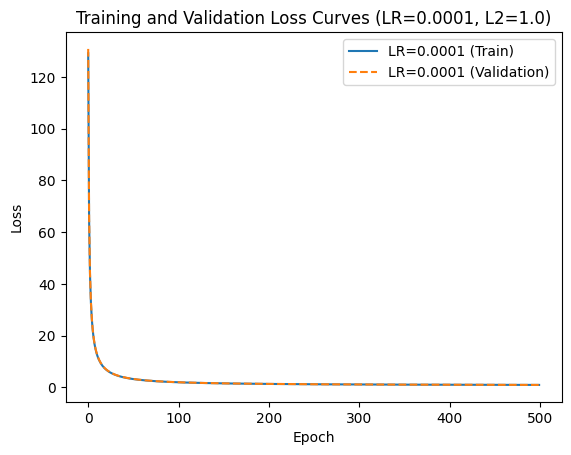

Learning Rate: 0.0001, Final Training Loss: 0.9503069073878255, Final Validation Loss: 0.9532396901091799
---------------------------


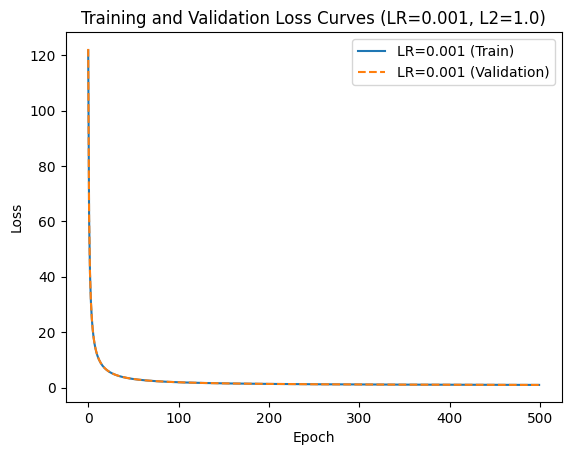

Learning Rate: 0.001, Final Training Loss: 0.9389563563159342, Final Validation Loss: 0.9352253358549815
---------------------------


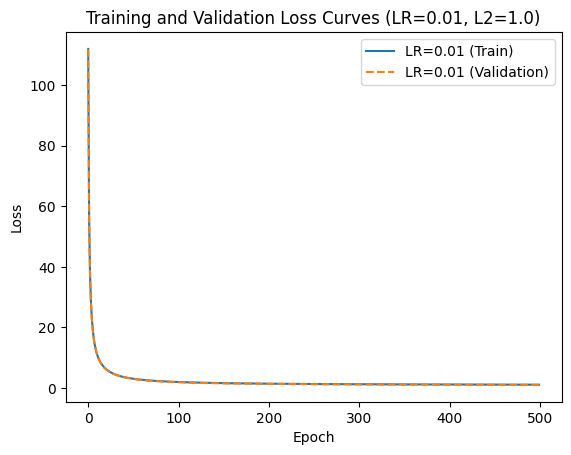

Learning Rate: 0.01, Final Training Loss: 1.1058079790705915, Final Validation Loss: 1.0309365153297443
---------------------------


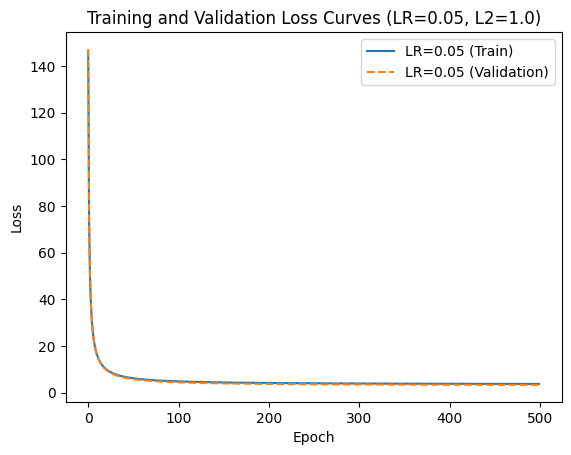

Learning Rate: 0.05, Final Training Loss: 3.790063029330487, Final Validation Loss: 3.3696975524694706
---------------------------


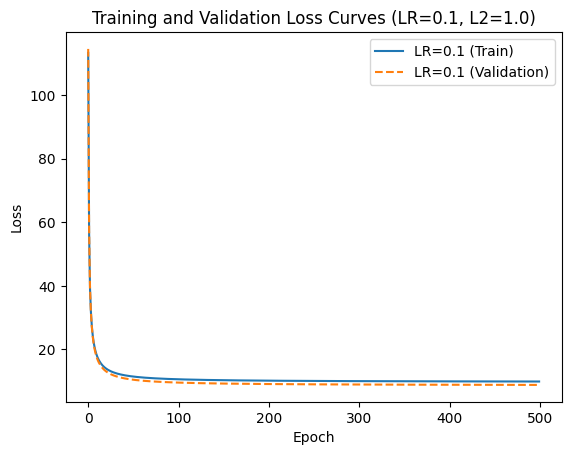

Learning Rate: 0.1, Final Training Loss: 9.907328575182007, Final Validation Loss: 8.833927371124977
---------------------------


In [4]:
import matplotlib.pyplot as plt

# Learning rates to try
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1]

for lr in learning_rates:
    # Initialize and train the logistic regression model
    model = LogisticGD(lr=lr, l2=1.0)
    loss_history = model.fit(X_train, Y_train, X_val, Y_val)

    # Extract training and validation losses from the loss history
    train_loss = loss_history[:, 0]
    val_loss = loss_history[:, 1]

    # Plot the loss curves for each learning rate
    plt.figure()
    plt.plot(train_loss, label=f"LR={lr} (Train)")
    plt.plot(val_loss, label=f"LR={lr} (Validation)", linestyle='dashed')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training and Validation Loss Curves (LR={lr}, L2=1.0)")
    plt.legend()
    plt.show()

    print(f"Learning Rate: {lr}, Final Training Loss: {train_loss[-1]}, Final Validation Loss: {val_loss[-1]}")
    print("---------------------------")
